## Static Features UMAP

In [ ]:
# UMAP for our dataframe from parkinsonHW_features

import numpy as np
import umap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
parkinsonhw_df = pd.read_csv('/work/5000_static_HW_features.csv')
parkinsonhw_df

,Subject ID,Category,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,...,Jerk Std,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std,Rate of Inversion in Pressure
0,C1,0,0.741703,0.213953,1.376681,0.000600,0.000772,0.006822,0.004925,0.034819,...,0.000398,0.003017,0.001654,0.000937,18137,900.403990,906.619046,936.988374,32.218438,0.012792
1,C2,0,0.561856,0.135978,1.030646,0.000326,0.000449,0.003585,0.001899,0.014263,...,0.000080,0.000622,0.001264,0.000693,24521,797.728963,797.026365,827.263664,17.249718,0.009951
2,C3,0,0.576393,0.123113,0.880655,0.000291,0.000422,0.003696,0.002393,0.019992,...,0.000206,0.001958,0.001209,0.000591,35559,856.772596,855.861037,881.170685,14.345989,0.006806
3,C4,0,0.614640,0.132637,1.006097,0.000365,0.000518,0.004139,0.002284,0.016273,...,0.000117,0.001339,0.001649,0.000848,21219,908.361163,914.190886,930.836925,15.640649,0.011641
4,C5,0,0.977548,0.294737,1.715694,0.000417,0.000720,0.009541,0.004476,0.032076,...,0.000244,0.002570,0.002232,0.001152,13886,935.546798,937.903803,1012.068821,44.730827,0.016059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P_26060007,1,0.766879,0.394579,2.521991,0.000655,0.000749,0.008158,0.006551,0.048635,...,0.000591,0.005485,0.001782,0.000962,28056,433.666127,453.835593,496.439416,60.849578,0.001711
72,H_P000-0035,1,2.474440,2.008780,17.906847,0.019659,0.009140,0.692307,1.031537,12.584664,...,0.932046,12.821862,0.011287,0.006440,14442,747.664064,768.484842,953.098470,110.298328,0.010040
73,H_p000-0018,1,0.451769,0.166524,0.826703,0.000952,0.000875,0.005636,0.005341,0.039233,...,0.000331,0.002511,0.002312,0.001094,32002,676.000805,672.298528,747.880698,31.140068,0.007562
74,P_23100002,1,0.640608,0.179111,1.188470,0.000340,0.000514,0.004599,0.002638,0.012668,...,0.000138,0.000829,0.001474,0.000754,29174,959.257873,971.041948,1009.106943,38.325740,0.007575


In [ ]:
#61 PD, 15 control
print(parkinsonhw_df.Category.value_counts())

1    61
0    15
Name: Category, dtype: int64


KeyboardInterrupt: 

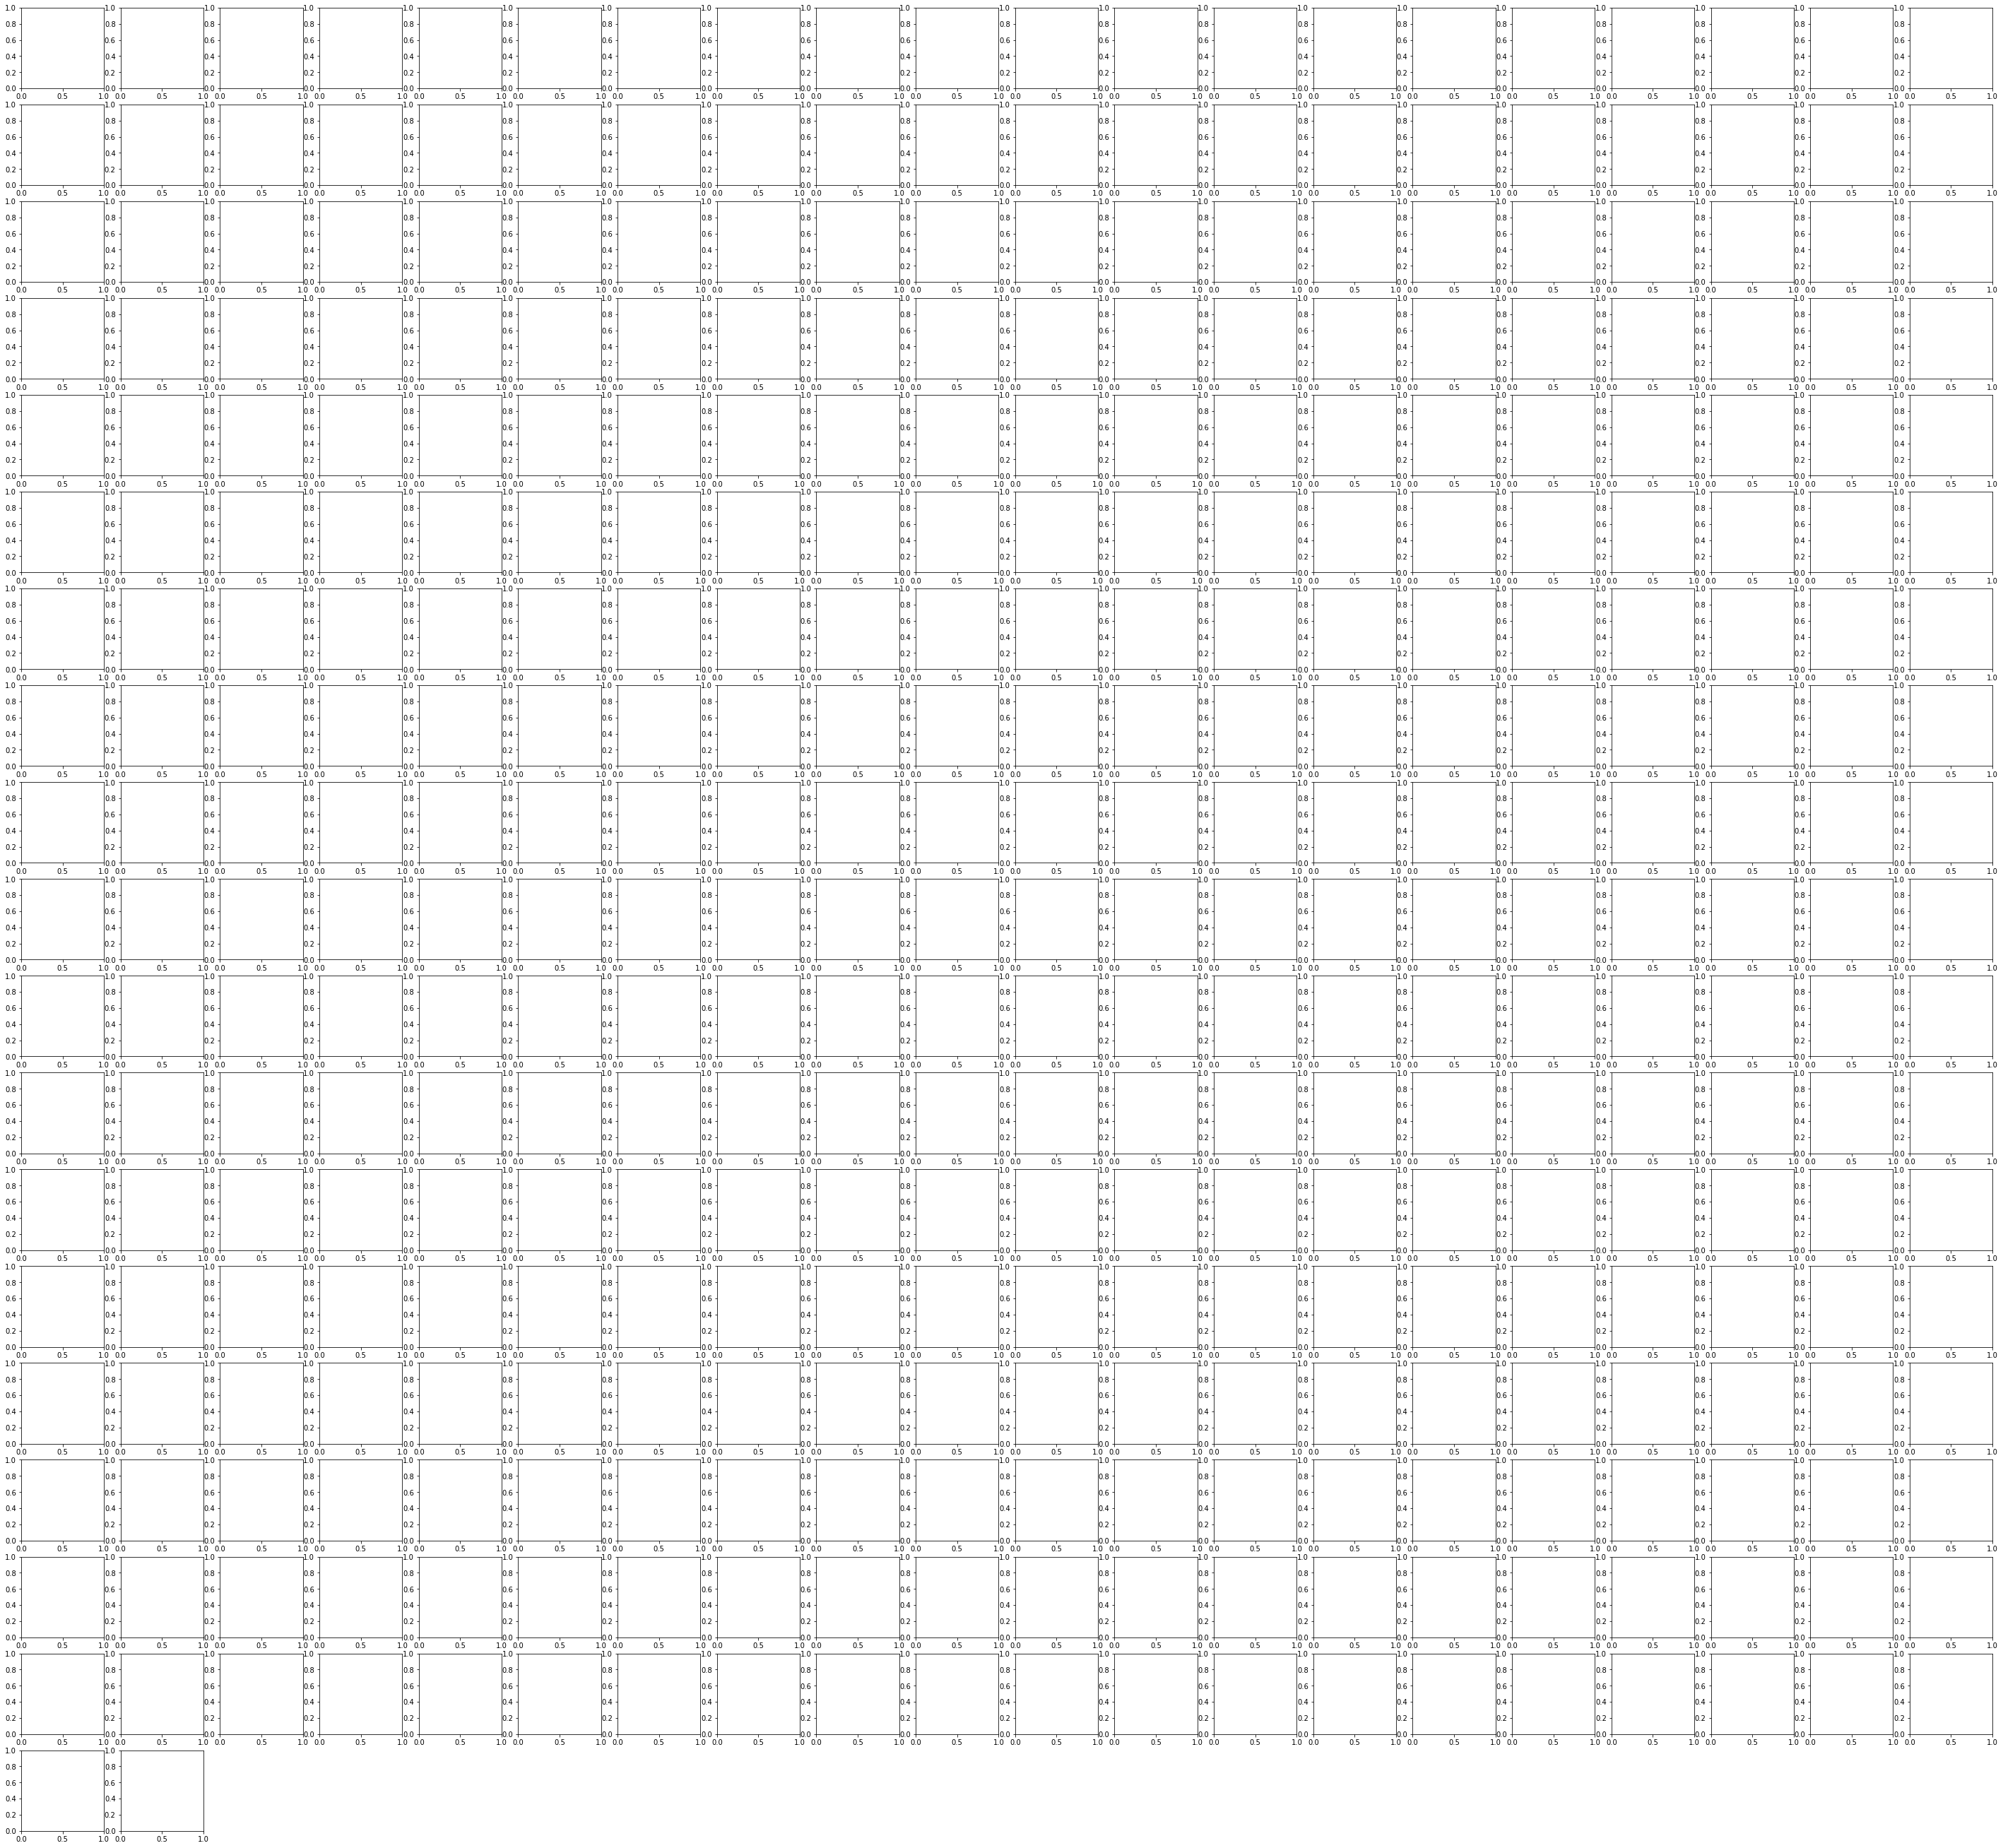

In [ ]:
#we can analyze the pairplots to find subsets of features that may allow umap to classify with more accuracy
sns.pairplot(parkinsonhw_df, hue='Category')

In [ ]:
#for higher dimensions change n_components
reducer = umap.UMAP(n_components=3)

In [ ]:
feature_columns = parkinsonhw_df.columns.tolist()[2:]

In [ ]:
feature_data = parkinsonhw_df[feature_columns].values
print(feature_data)

[[7.41703385e-01 2.13952943e-01 1.37668120e+00 ... 9.36988374e+02
  3.22184383e+01 1.27915311e-02]
 [5.61855990e-01 1.35977920e-01 1.03064628e+00 ... 8.27263664e+02
  1.72497178e+01 9.95065454e-03]
 [5.76393041e-01 1.23113152e-01 8.80654684e-01 ... 8.81170685e+02
  1.43459886e+01 6.80559071e-03]
 ...
 [4.51769426e-01 1.66524489e-01 8.26702821e-01 ... 7.47880698e+02
  3.11400678e+01 7.56202737e-03]
 [6.40608480e-01 1.79110593e-01 1.18847043e+00 ... 1.00910694e+03
  3.83257400e+01 7.57523823e-03]
 [1.60794914e+00 4.05464923e-01 2.71170976e+00 ... 9.01408976e+02
  4.87470490e+01 1.57865481e-02]]


In [ ]:
scaled_feature_data = StandardScaler().fit_transform(feature_data)
print(scaled_feature_data)

[[-0.49802695 -0.54616495 -0.52269112 ...  1.02381718 -1.07692974
   0.44133737]
 [-0.71329154 -0.72592059 -0.64037612 ...  0.32723339 -1.64140277
   0.01451746]
 [-0.69589172 -0.75557771 -0.69138762 ...  0.66946038 -1.75090289
  -0.45800426]
 ...
 [-0.84505736 -0.65550166 -0.70973641 ... -0.17672682 -1.11759528
  -0.34435545]
 [-0.61903039 -0.62648694 -0.5867008  ...  1.4816596  -0.84662235
  -0.34237062]
 [ 0.53880788 -0.10467282 -0.06865362 ...  0.79794251 -0.45363299
   0.89131569]]


In [ ]:
embedding = reducer.fit_transform(scaled_feature_data)
embedding.shape

(76, 3)

In [ ]:
embedding

array([[ 4.5049324 , 10.238499  , -0.19343896],
       [ 4.02268   , 10.551652  , -0.6203116 ],
       [ 3.9519775 , 10.900537  , -0.49030462],
       [ 4.3768687 , 10.720594  , -0.3916064 ],
       [ 4.502901  , 10.239127  ,  0.2028644 ],
       [ 4.136195  , 10.413878  , -0.3449816 ],
       [ 4.3572617 , 10.423089  , -0.10627788],
       [ 2.2968986 , 12.7756815 ,  1.4666514 ],
       [ 2.3697362 , 12.599061  ,  1.0326782 ],
       [ 4.0354247 , 11.307234  , -0.30748135],
       [ 4.0646124 , 11.519184  , -0.12449427],
       [ 4.449006  , 10.724182  ,  0.14665802],
       [ 3.6706533 , 11.337058  ,  2.9640982 ],
       [ 3.8384986 , 12.017983  ,  3.0515988 ],
       [ 2.0048869 , 12.414169  ,  2.9909003 ],
       [ 4.076607  , 10.665728  ,  0.94927466],
       [ 4.010317  , 10.522976  ,  1.2324001 ],
       [ 2.1549516 , 12.918842  ,  2.776589  ],
       [ 3.0826101 , 13.016814  ,  1.7218858 ],
       [ 2.6685326 , 12.170691  ,  2.4577692 ],
       [ 2.612626  , 12.083392  ,  2.767

Text(0.5, 1.0, 'UMAP projection of the features_df_static dataset')

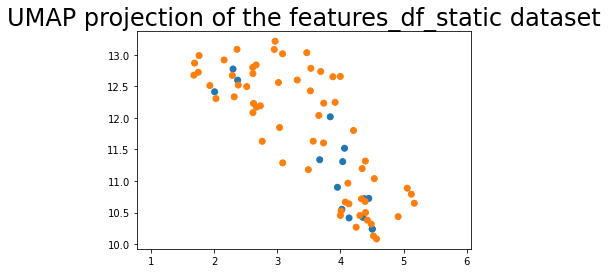

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in parkinsonhw_df.Category.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the features_df_static dataset', fontsize=24)

In [ ]:
#umap - 2-d reduction plotted above
#note - since umap is a stochastic algorithm, it will give different plots each time it is performed

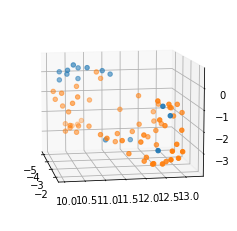

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-embedding[:,0], embedding[:,1], -embedding[:,2],c=[sns.color_palette()[x] for x in parkinsonhw_df.Category.map({0:0, 1:1})])
ax.view_init(10, -10)


In [ ]:
#umap - 3-d reduction plotted above
#note - look at different subsets of data?

In [ ]:
for i in range(0, 100, 30):
    for j in range(0, 100, 30):
        ax.view_init(i, j)
        plt.draw()
        plt.pause(.001)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Static Features PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
projected_data = pca.fit_transform(feature_data)
    #feature_data defined above
    #fit_transform fits and then does dimensionality reduction
print(projected_data[:10])

[[-5166.1944487   -340.97694056]
 [ 1217.50881128  -145.39776608]
 [12255.64606734  -227.68546799]
 [-2084.19550518  -341.8449617 ]
 [-9417.05208003  -428.86461031]
 [-4364.31718159  -260.1132458 ]
 [-6222.17332973  -351.20535887]
 [16031.08422094   150.34541207]
 [25124.38031925   -37.74384161]
 [15771.80001209  -309.54043315]]


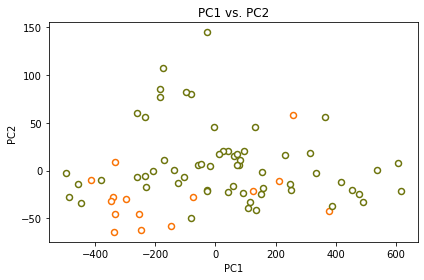

In [ ]:
#make PCA plot
fig, ax = plt.subplots()
colormap = ['xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
            'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
groupAssignments = parkinsonhw_df["Category"].tolist()
for i in range(len(projected_data)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_data[i,0], projected_data[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2')
plt.tight_layout()

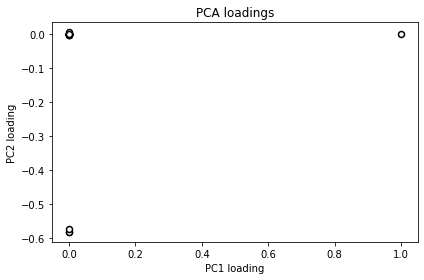

In [ ]:
#plot pca loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2']).to_numpy()

fig, ax = plt.subplots()
for i in range(20):
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(loadings[i,0], loadings[i,1], marker=shape,mec = 'xkcd:black', mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1 loading')
ax.set_ylabel('PC2 loading')
ax.set_title('PCA loadings')
plt.tight_layout()

#loadings dispersed away from the origin are "significant"

In [ ]:
#0,1,2,3,4,5,6,8,12,13,15,16,17,18,19
truncated_data = feature_data[:,np.r_[0,1,2,3,4,5,6,8,12,13,15,16,17,18,19]] #picked some subset of features
pca = PCA(n_components = 2)
projected_Tdata = pca.fit_transform(truncated_data)

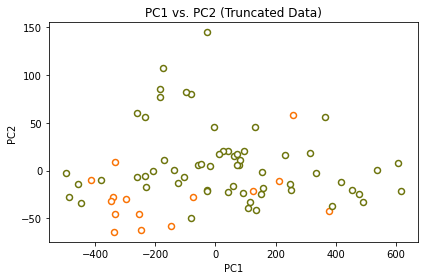

In [ ]:
#make PCA plot
fig, ax = plt.subplots()
for i in range(len(projected_Tdata)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_Tdata[i,0], projected_Tdata[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2 (Truncated Data)')
plt.tight_layout()

## 4/11/21 Static/Dynamic Features

In [ ]:
static_df = pd.read_csv('/work/Static_HW_features.csv')
dynamic_df = pd.read_csv('/work/Dynamic_HW_features.csv')

In [ ]:
static_feature_columns = static_df.columns.tolist()[2:]
static_data = static_df[static_feature_columns].values
dynamic_feature_columns = dynamic_df.columns.tolist()[2:]
dynamic_data = dynamic_df[dynamic_feature_columns].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
projected_static_data = pca.fit_transform(static_data)
pca2 = PCA()
projected_dynamic_data = pca2.fit_transform(dynamic_data)

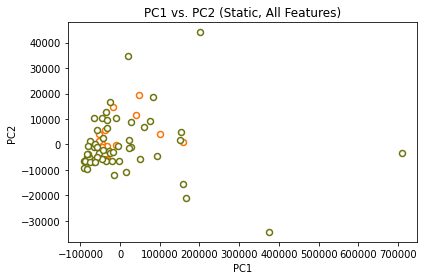

In [ ]:
fig, ax = plt.subplots()
colormap = ['xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
            'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
groupAssignments = static_df["Category"].tolist()
for i in range(len(projected_static_data)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_static_data[i,0], projected_static_data[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2 (Static, All Features)')
plt.tight_layout()

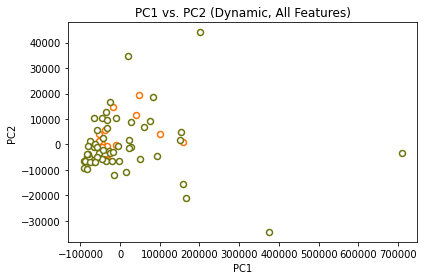

In [ ]:
fig, ax = plt.subplots()
groupAssignments = dynamic_df["Category"].tolist()
for i in range(len(projected_dynamic_data)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_dynamic_data[i,0], projected_dynamic_data[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2 (Dynamic, All Features)')
plt.tight_layout()

In [ ]:
print(static_data[:5])
print(dynamic_data[:5])
print(projected_static_data[:5])
print(projected_dynamic_data[:5])

[[ 7.63352698e-01  1.50814740e+00  2.56846779e-01  1.99008842e-04
   3.85951370e-04  5.35788719e-03  1.28158397e-02  2.13641480e-03
   6.61630920e-04  5.51218012e-05  1.82140035e-04  3.37188863e-05
   1.26812593e-03  1.81370000e+04  3.30815460e-04  8.84200931e+02
   9.41000000e+02  7.42284857e+01  3.78232343e-02  6.79307738e+01
   7.00182123e+01  1.47278327e-01  1.22220172e-01 -7.15792054e-01
  -7.71275490e-01  3.28632838e-02  9.99567282e-01  1.17599768e-01
   9.92040547e-01  6.37744810e-01  8.20932577e+02  5.63854961e-02
   5.63975750e+04  6.46653801e-01 -2.00397750e-02  2.14137887e-05
   2.15747863e+00  7.17803537e-01  3.86861351e-01  8.37578081e-04
   9.03727776e+01  3.87000000e+02  6.33000000e+02  5.00000000e+01
   8.22000000e+02]
 [ 5.59823205e-01  1.00181224e+00  1.37362891e-01  2.38464940e-04
   2.85469597e-04  3.09073795e-03  6.72999579e-03  1.06630327e-03
   5.70939195e-04  3.11718013e-05  1.14923001e-04  2.07870764e-05
   1.06031565e-03  2.45210000e+04  2.85469597e-04  7.8845

In [ ]:
#'Rate of Inversion in Pressure'
#'Pressure Reg x0'
#'Pressure Std'
truncated_dynamic_df = dynamic_df[['Rate of Inversion in Pressure','Pressure Reg x0', 'Pressure Std']]

    Rate of Inversion in Pressure  Pressure Reg x0  Pressure Std
0                        0.037823       820.932577     74.228486
1                        0.037723       773.765501     42.278467
2                        0.019404       810.860029     58.960291
3                        0.037891       908.578179     56.773158
4                        0.037448       866.572344     84.200983
..                            ...              ...           ...
71                       0.006416       405.883127    109.392847
72                       0.026658       683.409011    127.856692
73                       0.029498       608.920676     65.254108
74                       0.032872       886.472140     90.992836
75                       0.021568       718.066481    107.423860

[76 rows x 3 columns]


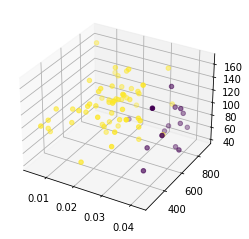

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(truncated_dynamic_df['Rate of Inversion in Pressure'], 
truncated_dynamic_df['Pressure Reg x0'], truncated_dynamic_df['Pressure Std'], c = groupAssignments);


### April 24, 2021 PCA on Subsets of All Compiled Features

In [ ]:
#~85 features total
#select informative subsets, run PCA
# pressure rising & falling duration/

static_features_df = pd.read_csv('/work/Static_HW_features.csv')
dynamic_features_df = pd.read_csv('/work/Dynamic_HW_features.csv')
static_features_df
dynamic_features_df

,dynamic Subject ID,Category,Mean Velocity,Max Velocity,Velocity Std,NVV,NIV,Mean Acceleration,Max Acceleration,Accleration Std,...,R dotdot Mean,R dotdot STD,T dotdot Mean,T dotdot STD,drdtheta Mean,drdtheta STD,Pressure Rising Duration,Pressure Rising Range,Pressure Falling Duration,Pressure Falling Range
0,/work/ParkinsonHW/C_0001.txt,0,0.763353,1.508147,0.256847,0.000199,0.000386,0.005358,0.012816,0.002136,...,-0.000290,0.003108,-0.000003,0.000004,10.610610,9.597464,387,633,50,822
1,/work/ParkinsonHW/C_0002.txt,0,0.559823,1.001812,0.137363,0.000238,0.000285,0.003091,0.006730,0.001066,...,-0.000100,0.002019,-0.000002,0.000002,10.803881,11.155429,387,561,43,713
2,/work/ParkinsonHW/C_0003.txt,0,0.577474,0.808143,0.119065,0.000142,0.000253,0.002888,0.006152,0.001091,...,0.000180,0.003554,-0.000003,0.000003,11.830677,12.358261,630,636,54,682
3,/work/ParkinsonHW/C_0004.txt,0,0.645112,1.133661,0.151134,0.000251,0.000330,0.004083,0.012296,0.002318,...,-0.000123,0.003338,-0.000005,0.000005,10.404557,15.273382,626,733,42,802
4,/work/ParkinsonHW/C_0005.txt,0,0.995901,1.976179,0.344574,0.000203,0.000360,0.009018,0.018844,0.003200,...,-0.000461,0.003006,-0.000006,0.000006,10.601360,8.134354,584,652,50,733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,/work/ParkinsonHW/P_26060007.txt,1,0.766646,2.073436,0.378668,0.000396,0.000642,0.006019,0.022859,0.003773,...,-0.000338,0.015033,-0.000002,0.000003,13.639552,35.132567,4394,326,63,424
72,/work/ParkinsonHW/H_P000-0035.txt,1,2.026080,9.373600,1.224294,0.017409,0.008655,0.431046,2.685503,0.403142,...,-0.013530,1.386249,-0.000033,0.000038,27.093770,322.825381,614,398,3884,363
73,/work/ParkinsonHW/H_p000-0018.txt,1,0.452617,0.801572,0.169099,0.000637,0.000719,0.003721,0.018696,0.002739,...,-0.000213,0.015425,-0.000003,0.000004,18.972630,70.527852,767,490,42,585
74,/work/ParkinsonHW/P_23100002.txt,1,0.635284,1.069605,0.161262,0.000191,0.000274,0.003823,0.006819,0.001408,...,0.000037,0.004329,-0.000006,0.000007,12.684681,32.778074,1342,632,63,871


In [ ]:
static_feature_columns = static_features_df.columns.tolist()[2:]
static_data = static_features_df[static_feature_columns].values
dynamic_feature_columns = dynamic_features_df.columns.tolist()[2:]
dynamic_data = dynamic_features_df[dynamic_feature_columns].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected_static_data = pca.fit_transform(static_data)
pca2 = PCA(n_components=2)
projected_dynamic_data = pca2.fit_transform(dynamic_data)

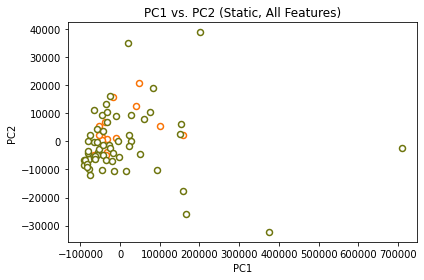

In [ ]:
fig, ax = plt.subplots()
colormap = ['xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
            'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
groupAssignments = static_features_df["Category"].tolist()
for i in range(len(projected_static_data)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_static_data[i,0], projected_static_data[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2 (Static, All Features)')
plt.tight_layout()

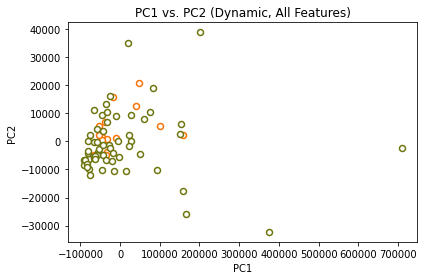

In [ ]:
fig, ax = plt.subplots()
colormap = ['xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
            'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
groupAssignments = dynamic_features_df["Category"].tolist()
for i in range(len(projected_dynamic_data)):
    edgecolor = colormap[groupAssignments[i]]
    fillcolor = 'w'
    shape     = 'o'
    ax.plot(projected_dynamic_data[i,0], projected_dynamic_data[i,1], marker=shape,mec = edgecolor, mfc=fillcolor, mew=1.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2 (Dynamic, All Features)')
plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>